# BT4211 Project


## Feature Description
- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not - frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid
- CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRC_FULL_PAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

## 1. Import Libraries

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder, RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer

In [3]:
import warnings
warnings.filterwarnings(action="ignore")

## 2. Read Data & Data Validation

In [4]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.shape

(8950, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
#Check for missing/NULL values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df['CUST_ID'].nunique()

8950

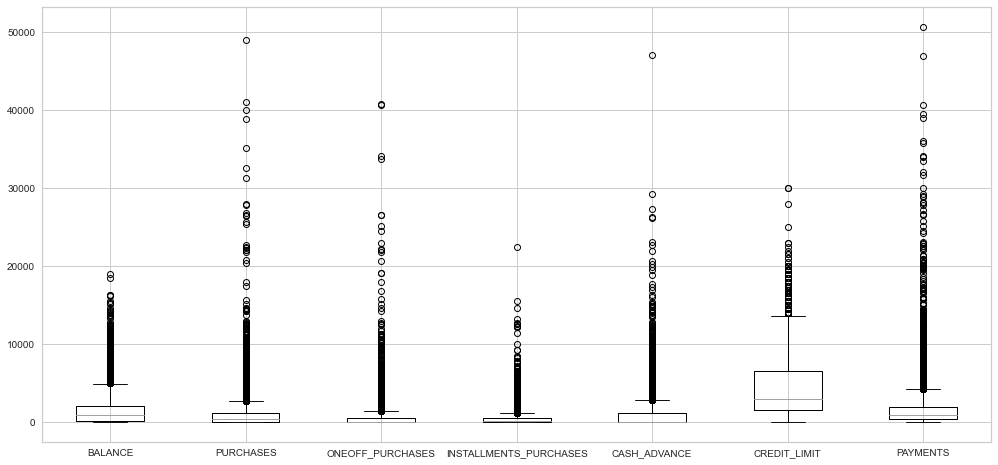

In [10]:
#Based on the boxplot, we observed that there is a significant amount of data that are outliers.
plt.figure(figsize=(17,8))
df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']].boxplot()
plt.show()

In [11]:
# Quantile Statistics
# Additionally, the quantiles/ IQR is observed to have a wide range 
quantile = df.describe().loc[["min", "25%", "50%", "75%", "max"]].transpose()
quantile.columns = ["min", "Q1", "Q2", "Q3", "max"]
quantile["range"] = quantile["max"] - quantile["min"]
quantile["IQR"] = quantile["Q3"] - quantile["Q1"]
quantile

,min,Q1,Q2,Q3,max,range,IQR
BALANCE,0.000000,128.281915,873.385231,2054.140036,19043.13856,19043.138560,1925.858120
BALANCE_FREQUENCY,0.000000,0.888889,1.000000,1.000000,1.00000,1.000000,0.111111
PURCHASES,0.000000,39.635000,361.280000,1110.130000,49039.57000,49039.570000,1070.495000
ONEOFF_PURCHASES,0.000000,0.000000,38.000000,577.405000,40761.25000,40761.250000,577.405000
INSTALLMENTS_PURCHASES,0.000000,0.000000,89.000000,468.637500,22500.00000,22500.000000,468.637500
CASH_ADVANCE,0.000000,0.000000,0.000000,1113.821139,47137.21176,47137.211760,1113.821139
PURCHASES_FREQUENCY,0.000000,0.083333,0.500000,0.916667,1.00000,1.000000,0.833334
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.000000,0.083333,0.300000,1.00000,1.000000,0.300000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,0.000000,0.166667,0.750000,1.00000,1.000000,0.750000
CASH_ADVANCE_FREQUENCY,0.000000,0.000000,0.000000,0.222222,1.50000,1.500000,0.222222


In [12]:
#patching null values in data set using KNNImputer to avoid bias
null_columns = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

imputer = KNNImputer()
patches = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns = null_columns)
df = df.fillna(patches)

In [13]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
#Feature Engineering
#Based on the type of purchases, we can classify or categorise it according to type of purchase they made.
df['type_of_purchase'] = np.where((df['INSTALLMENTS_PURCHASES'] == 0) & (df['ONEOFF_PURCHASES'] == 0), 'Cash',
                        np.where((df['INSTALLMENTS_PURCHASES'] == 0) & (df['ONEOFF_PURCHASES'] > 0), 'One_off',
                        np.where((df['INSTALLMENTS_PURCHASES'] > 0) & (df['ONEOFF_PURCHASES'] == 0), 'Installment', 'Both')))

#Monthly Average Purchase over the period the customer has been using the card
df['avg_monthly_purchase'] = df['PURCHASES']/df['TENURE']
                                  
#Monthly Average Cash Advance over the period the customer has been using the card
df['avg_monthly_cash'] = df['CASH_ADVANCE']/df['TENURE']

#Monthly Average Payments over the period the customer has been using the card
df['avg_monthly_payments'] = df['PAYMENTS']/df['TENURE']

#Utilization rate of Credit Card
df['utilisation_ratio'] = df['BALANCE']/df['CREDIT_LIMIT']

#Payments to Minimum payments ratio
df['payments_to_min_payments'] = df['PAYMENTS']/df['MINIMUM_PAYMENTS']

#Since all CUST_ID are truly unique, we can drop the column on cust_id
df = df.drop(['CUST_ID'], axis = 1)

## 3. Exploratory Data Analysis (EDA)

In [15]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'type_of_purchase', 'avg_monthly_purchase',
       'avg_monthly_cash', 'avg_monthly_payments', 'utilisation_ratio',
       'payments_to_min_payments'],
      dtype='object')

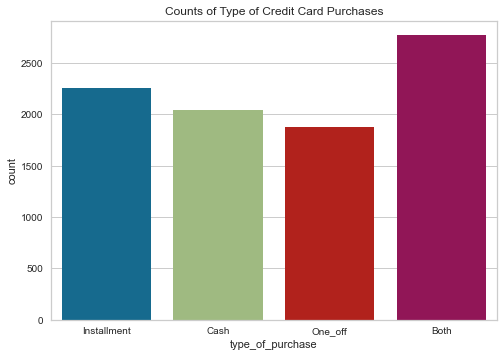

In [16]:
sns.countplot(data = df, x = 'type_of_purchase')
plt.title('Counts of Type of Credit Card Purchases')
plt.show()

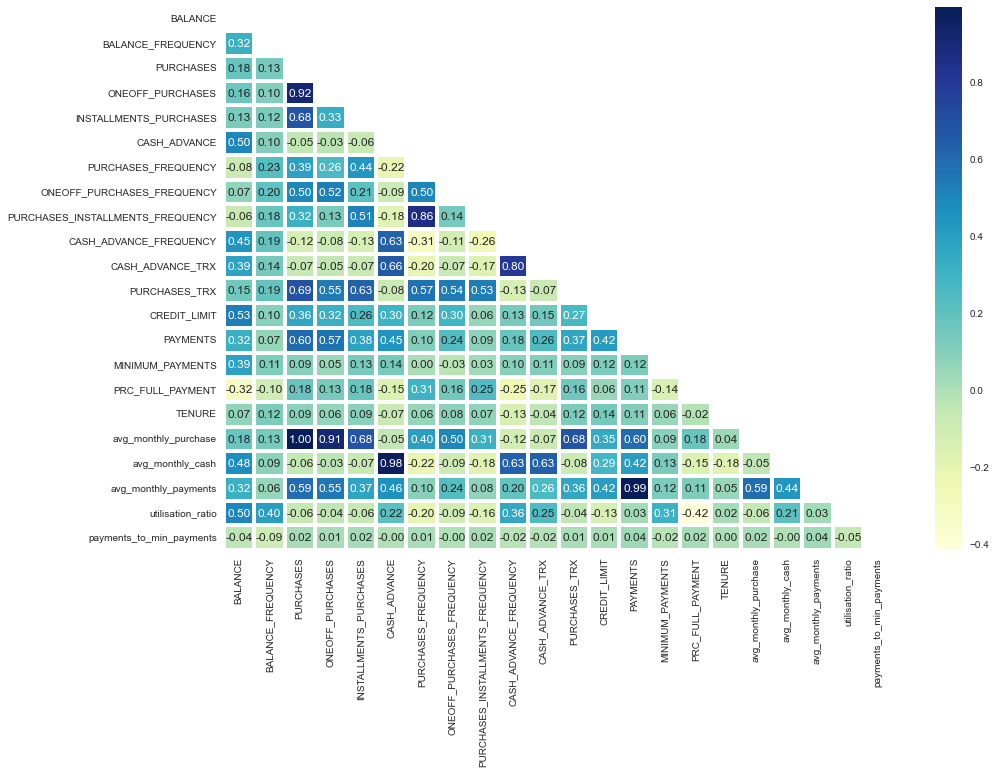

In [17]:
corr = df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True, cmap='YlGnBu', linewidths=3, fmt=".2f", mask = np.triu(corr))
plt.show()

In [18]:
# Creating a bar plot showing the correlation of the numeric features
c = corr.abs()
corr_bar = c.unstack().sort_values(kind='quicksort')
corr_bar = corr_bar.loc[lambda x: x < 1]
corr_bar = corr_bar.drop_duplicates()
corr_bar = corr_bar.sort_values(ascending = False)

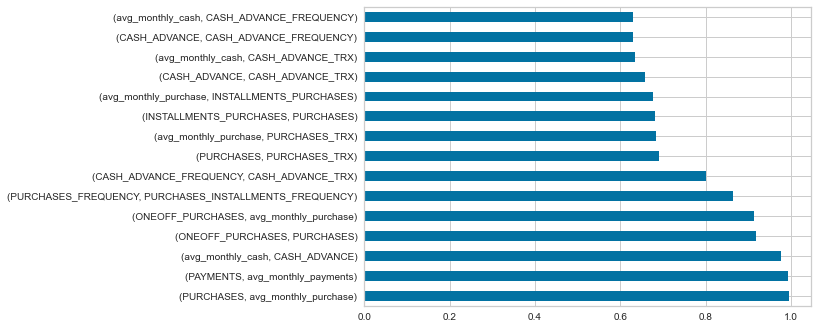

In [19]:
#top 15 correlated features.
corr_bar[:15].plot(kind = 'barh')
plt.show()

In [20]:
NUMERICAL_VARIABLES = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'avg_monthly_purchase', 'avg_monthly_cash', 'avg_monthly_payments', 
       'utilisation_ratio', 'payments_to_min_payments']
CATEGORICAL_VARIABLES = ['type_of_purchase']

In [21]:
#General Descriptive Statistics for Numerical Features
descriptive_stats = df[NUMERICAL_VARIABLES].describe().loc[["mean", "std", "50%"]].transpose()
descriptive_stats.columns = ["mean", "std", "median"]
descriptive_stats["mode"] = df.mode().transpose()[0]
descriptive_stats["mad"] = [stats.median_abs_deviation(df[x]) for x in NUMERICAL_VARIABLES]
descriptive_stats["kurtosis"] = [stats.kurtosis(df[x], fisher=False) for x in NUMERICAL_VARIABLES]
descriptive_stats["excess kurtosis"] = [stats.kurtosis(df[x], fisher=True) for x in NUMERICAL_VARIABLES]
descriptive_stats["skewness"] = [stats.skew(df[x]) for x in NUMERICAL_VARIABLES]
descriptive_stats

,mean,std,median,mode,mad,kurtosis,excess kurtosis,skewness
BALANCE,1564.474828,2081.531879,873.385231,0.0,799.865197,10.669794,7.669794,2.392985
BALANCE_FREQUENCY,0.877271,0.236904,1.000000,1.0,0.000000,6.089972,3.089972,-2.022926
PURCHASES,1003.204834,2136.634782,361.280000,0.0,361.280000,114.325882,111.325882,8.142904
ONEOFF_PURCHASES,592.437371,1659.887917,38.000000,0.0,38.000000,167.095191,164.095191,10.043399
INSTALLMENTS_PURCHASES,411.067645,904.338115,89.000000,0.0,89.000000,99.520563,96.520563,7.297897
CASH_ADVANCE,978.871112,2097.163877,0.000000,0.0,0.000000,55.869216,52.869216,5.165743
PURCHASES_FREQUENCY,0.490351,0.401371,0.500000,1.0,0.416667,1.361614,-1.638386,0.060154
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.298336,0.083333,0.0,0.083333,4.160526,1.160526,1.535355
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.397448,0.166667,0.0,0.166667,1.601479,-1.398521,0.509116
CASH_ADVANCE_FREQUENCY,0.135144,0.200121,0.000000,0.0,0.000000,6.332201,3.332201,1.828380


In [22]:
# sns.pairplot(df.drop(['type_of_purchase'], axis = 1))
# plt.show()

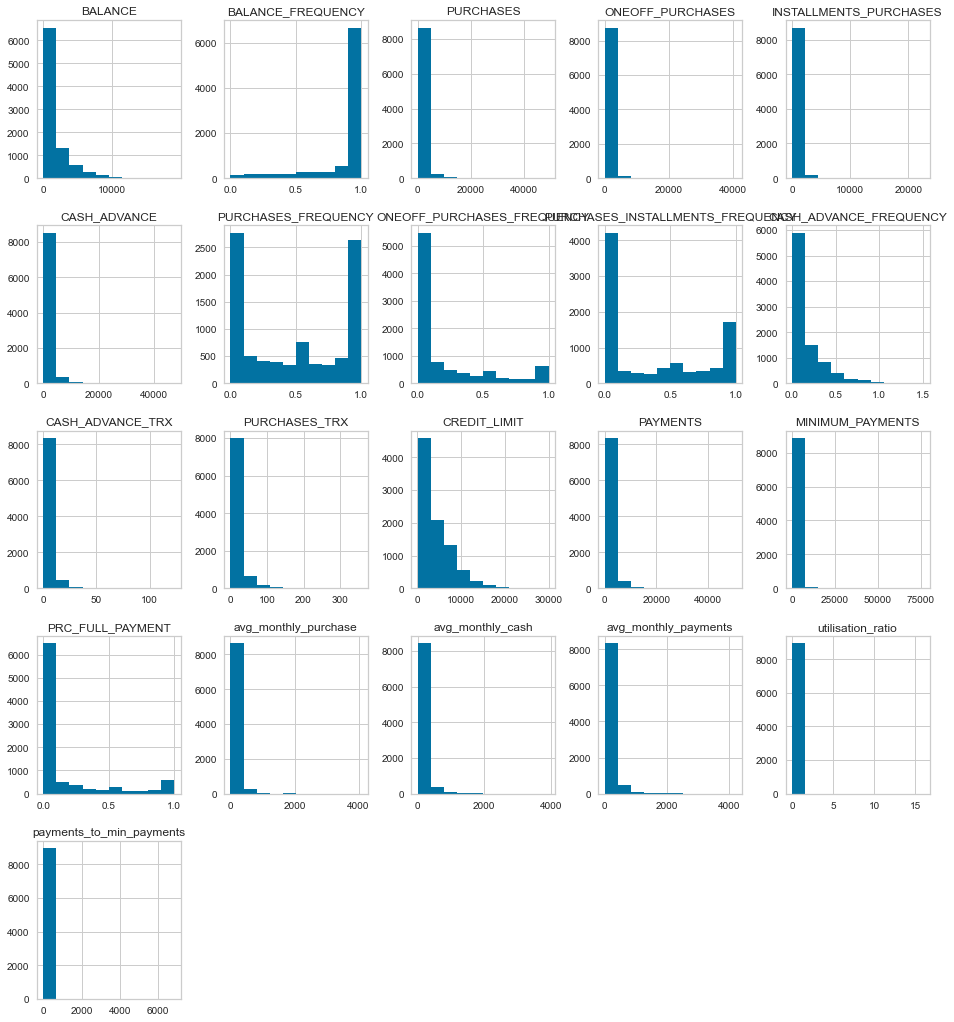

In [23]:
df[NUMERICAL_VARIABLES].hist(figsize = (16,18))
plt.show()

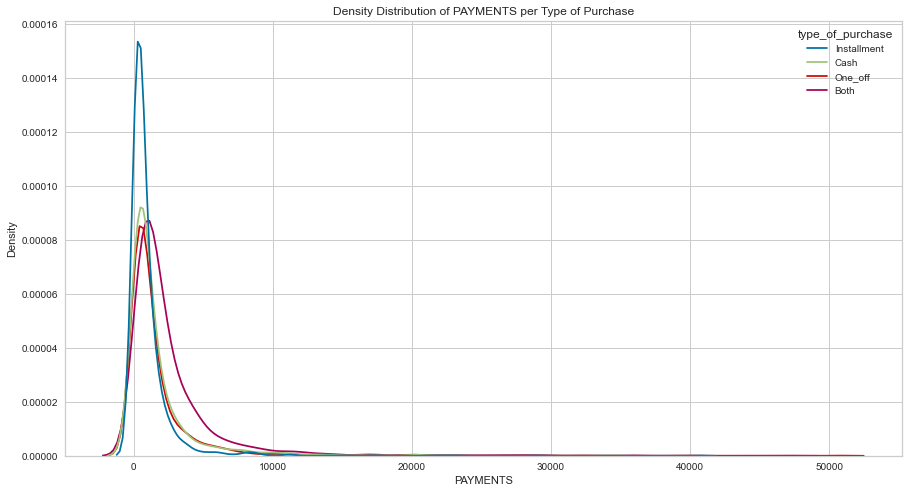

In [24]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df, x='PAYMENTS', hue="type_of_purchase").set(title=f"Density Distribution of PAYMENTS per Type of Purchase")
plt.show()

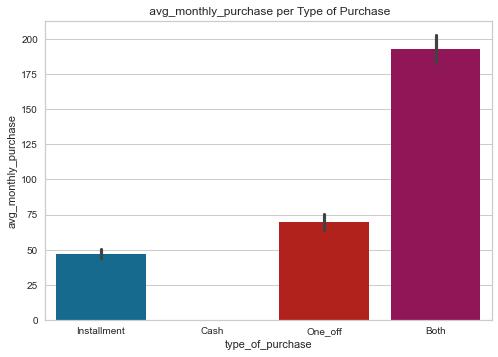

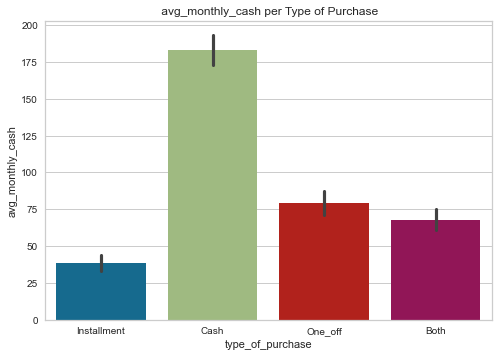

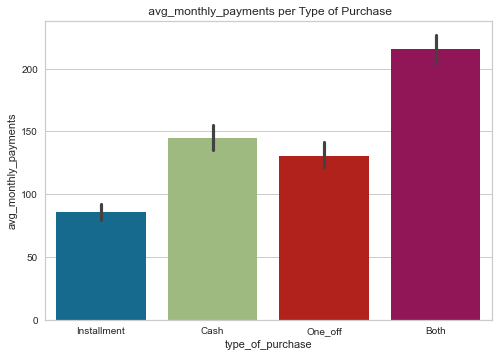

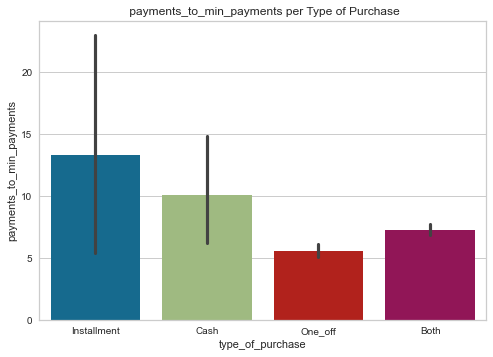

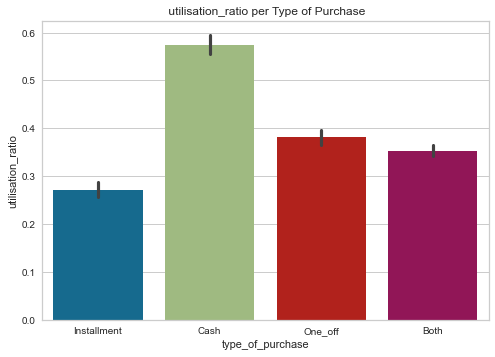

In [25]:
# Visualising spendings on type of purchase
SPENDING_VARIABLES = ['avg_monthly_purchase','avg_monthly_cash', 'avg_monthly_payments', 'payments_to_min_payments', 'utilisation_ratio']

for col in SPENDING_VARIABLES:
    sns.barplot(data = df, x = 'type_of_purchase', y = col).set(title=f" {col} per Type of Purchase")
    plt.show()

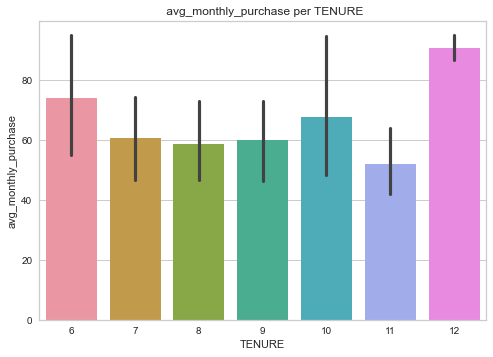

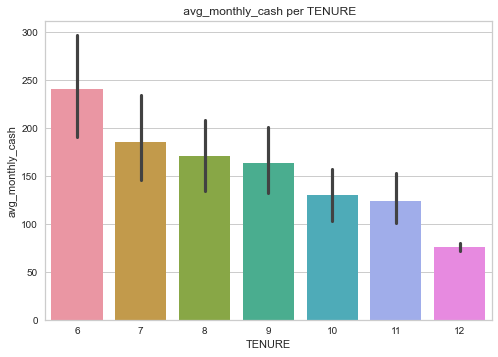

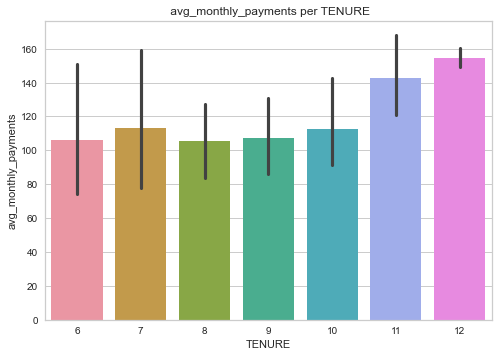

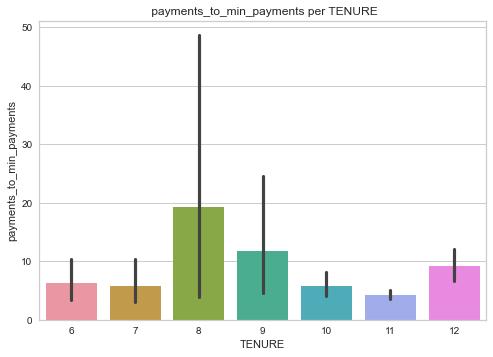

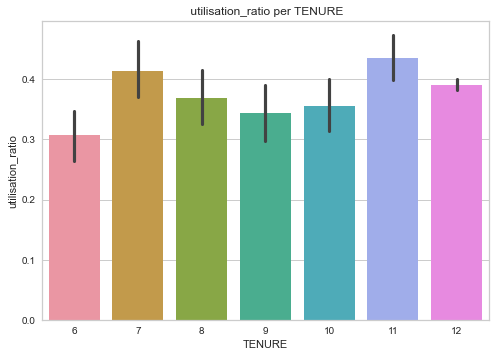

In [26]:
# Visualising spendings on tenure duration
for col in SPENDING_VARIABLES:
    sns.barplot(data = df, x = 'TENURE', y = col).set(title=f" {col} per TENURE")
    plt.show()

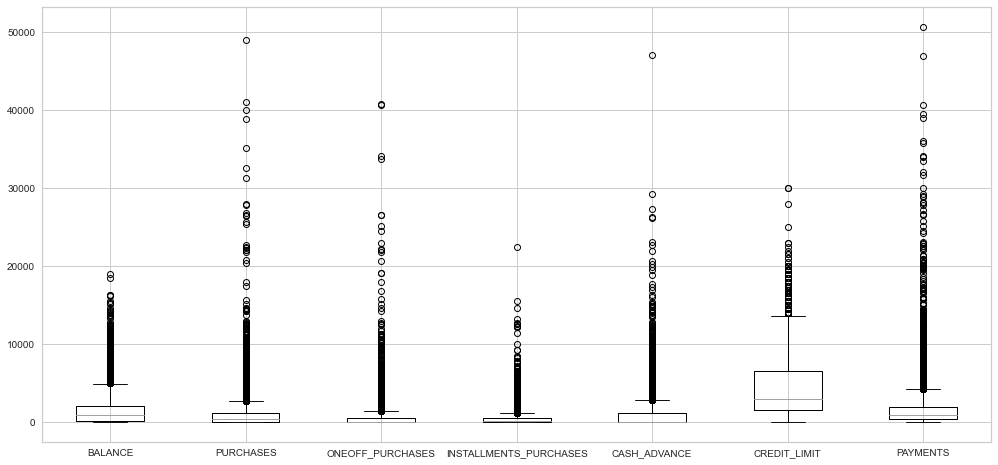

In [27]:
plt.figure(figsize=(17,8))
df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']].boxplot()
plt.show()

## 3.5 Feature Engineering

To deal with the cases for outliers, we will be using ranges to group these values together so we need not drop the outliers

In [47]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'type_of_purchase', 'avg_monthly_purchase',
       'avg_monthly_cash', 'avg_monthly_payments', 'utilisation_ratio',
       'payments_to_min_payments'],
      dtype='object')

In [48]:
df_range = df.copy()

In [49]:
numerical = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
            'avg_monthly_purchase', 'avg_monthly_cash', 'avg_monthly_payments', 'payments_to_min_payments']

for i in numerical:
    bucket = i +'_bin'
    df_range[bucket]=0        
    df_range.loc[((df_range[i]>0)&(df_range[i]<=500)), bucket]=1
    df_range.loc[((df_range[i]>500)&(df_range[i]<=1000)), bucket]=2
    df_range.loc[((df_range[i]>1000)&(df_range[i]<=3000)), bucket]=3
    df_range.loc[((df_range[i]>3000)&(df_range[i]<=5000)), bucket]=4
    df_range.loc[((df_range[i]>5000)&(df_range[i]<=10000)), bucket]=5
    df_range.loc[((df_range[i]>10000)), bucket]=6
    
df_range.drop(numerical, axis =1, inplace = True)

In [50]:
frequency = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for i in frequency:
    bucket = i +'_bin'
    df_range[bucket]=0        
    df_range.loc[((df_range[i]>0)&(df_range[i]<=0.1)), bucket]=1
    df_range.loc[((df_range[i]>0.1)&(df_range[i]<=0.2)), bucket]=2
    df_range.loc[((df_range[i]>0.2)&(df_range[i]<=0.3)), bucket]=3
    df_range.loc[((df_range[i]>0.3)&(df_range[i]<=0.4)), bucket]=4
    df_range.loc[((df_range[i]>0.4)&(df_range[i]<=0.5)), bucket]=5
    df_range.loc[((df_range[i]>0.5)&(df_range[i]<=0.6)), bucket]=6
    df_range.loc[((df_range[i]>0.6)&(df_range[i]<=0.7)), bucket]=7
    df_range.loc[((df_range[i]>0.7)&(df_range[i]<=0.8)), bucket]=8
    df_range.loc[((df_range[i]>0.8)&(df_range[i]<=0.9)), bucket]=9
    df_range.loc[((df_range[i]>0.9)&(df_range[i]<=1.0)), bucket]=10
    
df_range.drop(frequency, axis =1, inplace = True)

In [51]:
small = ['PURCHASES_TRX', 'CASH_ADVANCE_TRX','utilisation_ratio'] 

for i in small:
    bucket = i +'_bin'
    df_range[bucket]=0        
    df_range.loc[((df_range[i]>0)&(df_range[i]<=5)), bucket]=1
    df_range.loc[((df_range[i]>5)&(df_range[i]<=10)), bucket]=2
    df_range.loc[((df_range[i]>10)&(df_range[i]<=15)), bucket]=3
    df_range.loc[((df_range[i]>15)&(df_range[i]<=20)), bucket]=4
    df_range.loc[((df_range[i]>20)&(df_range[i]<=30)), bucket]=5
    df_range.loc[((df_range[i]>30)&(df_range[i]<=50)), bucket]=6
    df_range.loc[((df_range[i]>50)&(df_range[i]<=100)), bucket]=7
    df_range.loc[((df_range[i]>100)), bucket]=8
    
df_range.drop(small, axis =1, inplace = True)

In [53]:
df_range.head()

,TENURE,type_of_purchase,BALANCE_bin,PURCHASES_bin,ONEOFF_PURCHASES_bin,INSTALLMENTS_PURCHASES_bin,CASH_ADVANCE_bin,CREDIT_LIMIT_bin,PAYMENTS_bin,MINIMUM_PAYMENTS_bin,...,payments_to_min_payments_bin,BALANCE_FREQUENCY_bin,PURCHASES_FREQUENCY_bin,ONEOFF_PURCHASES_FREQUENCY_bin,PURCHASES_INSTALLMENTS_FREQUENCY_bin,CASH_ADVANCE_FREQUENCY_bin,PRC_FULL_PAYMENT_bin,PURCHASES_TRX_bin,CASH_ADVANCE_TRX_bin,utilisation_ratio_bin
0,12,Installment,1,1,0,1,0,2,1,1,...,1,9,2,0,1,0,0,1,0,1
1,12,Cash,4,0,0,0,5,5,4,3,...,1,10,0,0,0,3,3,0,1,1
2,12,One_off,3,2,2,0,0,5,2,2,...,1,10,10,10,0,0,0,3,0,1
3,12,One_off,3,3,3,0,1,5,0,3,...,0,7,1,1,0,1,0,1,1,1
4,12,One_off,2,1,1,0,0,3,2,1,...,1,10,1,1,0,0,0,1,0,1


## 4. Feature Scaling

In [55]:
df_range = df_range.drop(columns = 'type_of_purchase')

In [60]:
scaler = StandardScaler()
X = df_range.copy()
df_scaled = scaler.fit_transform(X)
df_scaled

array([[ 0.36067954, -0.97851102, -0.43862278, ..., -0.64681226,
        -0.69462206,  0.08659774],
       [ 0.36067954,  1.29798329, -1.18015543, ..., -1.09971241,
         0.12597818,  0.08659774],
       [ 0.36067954,  0.53915185,  0.30290987, ...,  0.25898804,
        -0.69462206,  0.08659774],
       ...,
       [-4.12276757, -0.97851102, -0.43862278, ..., -0.64681226,
        -0.69462206,  0.08659774],
       [-4.12276757, -0.97851102, -1.18015543, ..., -1.09971241,
         0.12597818,  0.08659774],
       [-4.12276757, -0.97851102,  1.04444252, ...,  1.16478834,
         0.12597818,  0.08659774]])

## 5. PCA
To reduce the number of dimensions/factors

In [ ]:
pca = PCA().fit(df_scaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, 22, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 22, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
#We want to be able to see how many components explain 95% of the variance
pca = PCA(n_components= 0.90)
pca.fit(df_scaled)
reduced = pca.transform(df_scaled)

In [ ]:
var = pca.explained_variance_ratio_
var

In [ ]:
pca.explained_variance_

In [ ]:
#Cumulative Variance explains
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

pca_df = pd.DataFrame({'eigen_value': pca.explained_variance_, 'cumulative_variance':cum_var}, index=range(1,12)).round(4)

#Based on the results, we observe that 13 components explain 95% of the variance.
pca_df

In [ ]:
sns.lineplot(pca_df['cumulative_variance'])
plt.show()

### PCA Components Selection:

To explain roughly 90% of our variance, we decided to extract the first 11 variables to proceed.

#### PCA with 11 Components

In [ ]:
pca_11 = PCA(n_components = 11)
x_pca_11 = pca_11.fit_transform(df_scaled)

pca_11_df = pd.DataFrame(x_pca_11, columns = ['PC1', 'PC2' ,'PC3' ,'PC4' ,'PC5' ,'PC6', 'PC7','PC8', 'PC9', 'PC10', 'PC11'])
pca_11_df

In [ ]:
cols = df_scaled.columns
pca11_variables_df = pd.DataFrame(pca_11.components_.T, columns = ['PC_'+str(i) for i in range(1,len(pca_11_df.columns) + 1)], index = cols)
pca11_variables_df

In [325]:
pd.Series(pca_11.explained_variance_ratio_*100, index = ['PC_' + str(i) for i in range(1,12)])

PC_1     25.916043
PC_2     20.011845
PC_3      8.933802
PC_4      7.502180
PC_5      6.505232
PC_6      4.837195
PC_7      4.299435
PC_8      4.213721
PC_9      3.303385
PC_10     3.039797
PC_11     2.844642
dtype: float64

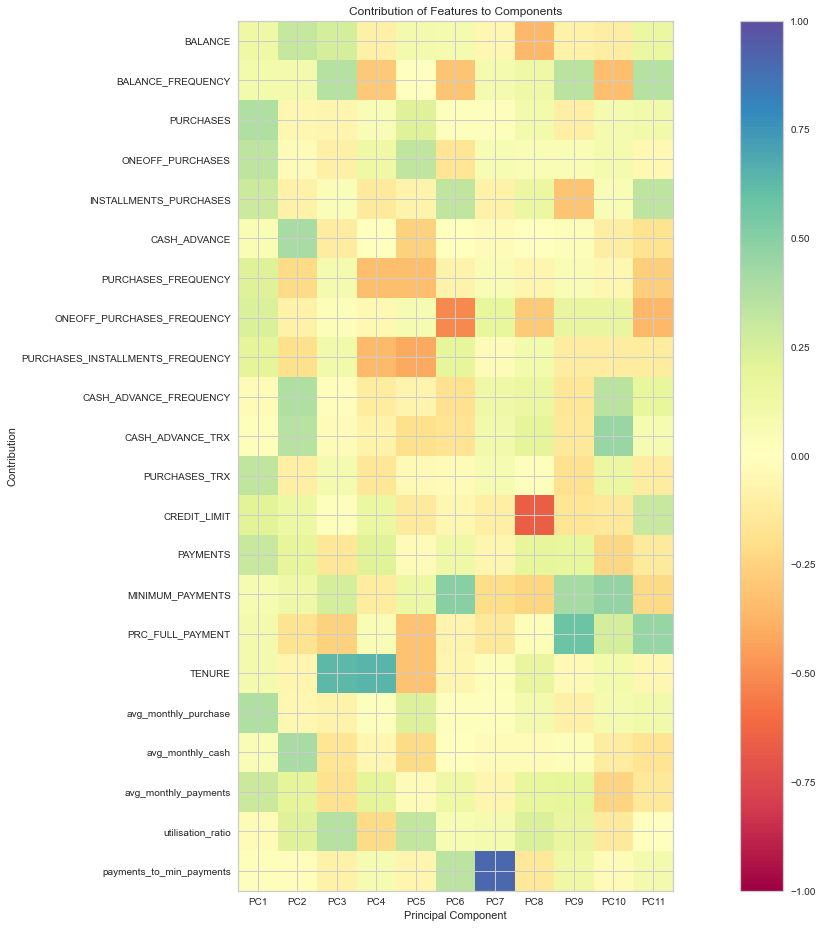

In [326]:
fig, ax = plt.subplots(figsize=(24, 16))
plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(df_scaled.columns)), df_scaled.columns)
plt.xticks(range(len(pca_11_df.columns)), pca_11_df.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()
plt.show()

#### Extract the first 7 variables that explain 85.95% variation cumulatively:

In [187]:
pca_7 = PCA(n_components=7)
x_pca_7 = pca_7.fit_transform(df_scaled)

pca_7_df = pd.DataFrame(x_pca_7, columns=['PC1 PC2 PC3 PC4 PC5 PC6 PC7'.split()])
pca_7_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.966123,-1.062686,-0.260591,1.039991,0.117657,0.023226,0.272474
1,-0.336565,3.518157,-0.558054,0.706472,-1.359663,0.196380,-0.122827
2,0.237338,-0.897055,0.515570,0.954472,0.798841,-1.286801,-1.814123
3,-1.087720,-0.290657,-0.766671,1.987239,0.837024,0.064820,-0.505988
4,-2.029104,-0.367332,0.363543,1.343636,1.170356,0.044409,-0.206988
...,...,...,...,...,...,...,...
8944,-1.150266,-1.749820,-2.974060,-4.547790,1.386398,0.817649,-0.977367
8945,-1.302126,-1.454509,-2.525861,-4.471662,1.943185,0.841494,-0.614333
8946,-1.677724,-1.513928,-3.104280,-4.139880,1.745773,0.774923,-0.628018
8947,-2.514788,-0.293194,-3.442951,-3.351165,2.276591,-0.210665,0.485974


In [188]:
list_columns = df_scaled.columns
pca7_variables_df = pd.DataFrame(pca_7.components_.T, columns = ['PC_'+str(i) for i in range(1,8)], index = list_columns)
pca7_variables_df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
BALANCE,0.129015,0.311106,0.237349,0.012045,0.140453,0.118482,-0.140971
BALANCE_FREQUENCY,0.101321,0.086020,0.387332,-0.169781,0.115141,-0.236134,-0.148080
PURCHASES,0.370775,-0.053594,-0.094312,0.087597,0.203203,-0.017854,0.072463
ONEOFF_PURCHASES,0.321643,-0.025322,-0.146445,0.170192,0.271828,-0.197626,0.055041
INSTALLMENTS_PURCHASES,0.285682,-0.080231,0.045957,-0.105464,-0.018901,0.320853,0.070153
CASH_ADVANCE,0.047933,0.405828,-0.095574,-0.059794,-0.239671,0.031447,-0.071067
PURCHASES_FREQUENCY,0.224816,-0.213189,0.135975,-0.310788,-0.192219,0.036138,-0.212269
ONEOFF_PURCHASES_FREQUENCY,0.237569,-0.082441,0.017432,-0.012223,0.076417,-0.468281,-0.157976
PURCHASES_INSTALLMENTS_FREQUENCY,0.193951,-0.189318,0.179257,-0.359989,-0.273036,0.245875,-0.049507
CASH_ADVANCE_FREQUENCY,-0.015916,0.379015,0.021456,-0.141034,-0.044528,-0.184641,0.075373


## 6. Clustering

1. K-means clustering (Elbow method) or Hierarchical Clustering, then dendogram
2. Get segment distribution (avg of each variable for each segment)
3. Profiling using personas 
4. Classify new customers into segments & 
5. Suggest relevant marketing strategies for each segment 

### K-Means Clustering (Elbow Method)

In [65]:
n_clusters=30
cost=[]
for i in range(1 ,n_clusters):
    kmean= KMeans(i, random_state = 0, max_iter = 500)
    kmean.fit(df_scaled)
    cost.append(kmean.inertia_) 

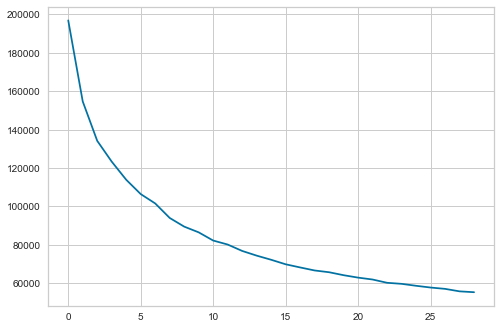

In [66]:
plt.plot(cost, 'bx-')
plt.show()

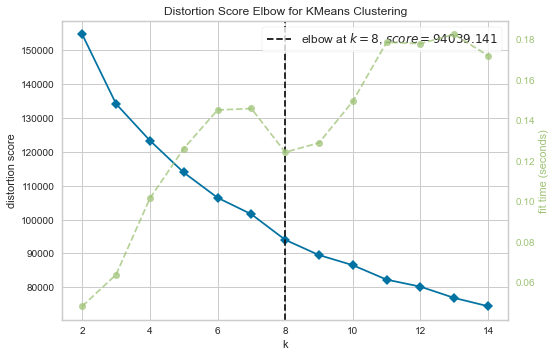

In [103]:
model = KMeans(random_state=0, max_iter = 500)
distortion_visualizer = KElbowVisualizer(model, k=(2,15))

distortion_visualizer.fit(df_scaled)       
distortion_visualizer.show()       
plt.show()

In [91]:
km_model = KMeans(8, random_state = 0, max_iter = 500)
km_model.fit(df_scaled)
labels = km_model.labels_
centroids = km_model.cluster_centers_

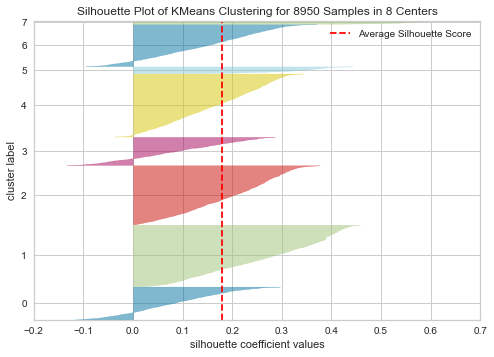

In [92]:
sil_viz= SilhouetteVisualizer(km_model, colors='yellowbrick')
sil_viz.fit(df_scaled)
sil_viz.show()
plt.show()

In [93]:
print(f'Davies-Bouldin index = {davies_bouldin_score(df_scaled, labels)}')
print(f'Silhouette Score = {silhouette_score(df_scaled, labels)}')

Davies-Bouldin index = 1.5493954130001122
Silhouette Score = 0.17848675386472354


In [94]:
cluster_df = pd.concat([df_range, pd.DataFrame({'cluster':labels})], axis = 1)
cluster_df.head()

,TENURE,BALANCE_bin,PURCHASES_bin,ONEOFF_PURCHASES_bin,INSTALLMENTS_PURCHASES_bin,CASH_ADVANCE_bin,CREDIT_LIMIT_bin,PAYMENTS_bin,MINIMUM_PAYMENTS_bin,avg_monthly_purchase_bin,...,BALANCE_FREQUENCY_bin,PURCHASES_FREQUENCY_bin,ONEOFF_PURCHASES_FREQUENCY_bin,PURCHASES_INSTALLMENTS_FREQUENCY_bin,CASH_ADVANCE_FREQUENCY_bin,PRC_FULL_PAYMENT_bin,PURCHASES_TRX_bin,CASH_ADVANCE_TRX_bin,utilisation_ratio_bin,cluster
0,12,1,1,0,1,0,2,1,1,1,...,9,2,0,1,0,0,1,0,1,4
1,12,4,0,0,0,5,5,4,3,0,...,10,0,0,0,3,3,0,1,1,3
2,12,3,2,2,0,0,5,2,2,1,...,10,10,10,0,0,0,3,0,1,6
3,12,3,3,3,0,1,5,0,3,1,...,7,1,1,0,1,0,1,1,1,5
4,12,2,1,1,0,0,3,2,1,1,...,10,1,1,0,0,0,1,0,1,4


In [95]:
cluster_df.cluster.value_counts()

4    1905
1    1861
2    1787
6    1268
0     995
3     849
5     205
7      80
Name: cluster, dtype: int64

In [108]:
Z = linkage(cluster_df, method='average', metric = 'euclidean')

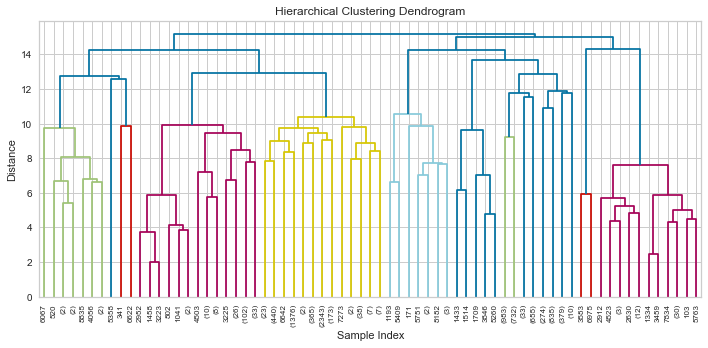

In [114]:
# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, truncate_mode='level', p = 6)
plt.tight_layout()
plt.show()

## 7. Cluster Analysis

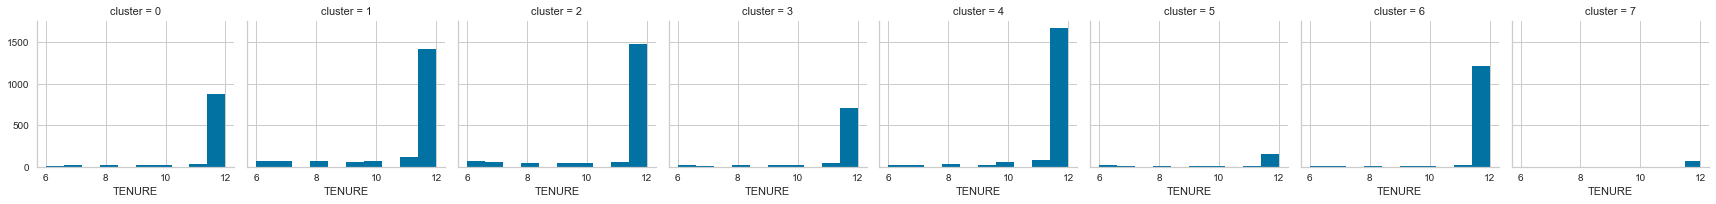

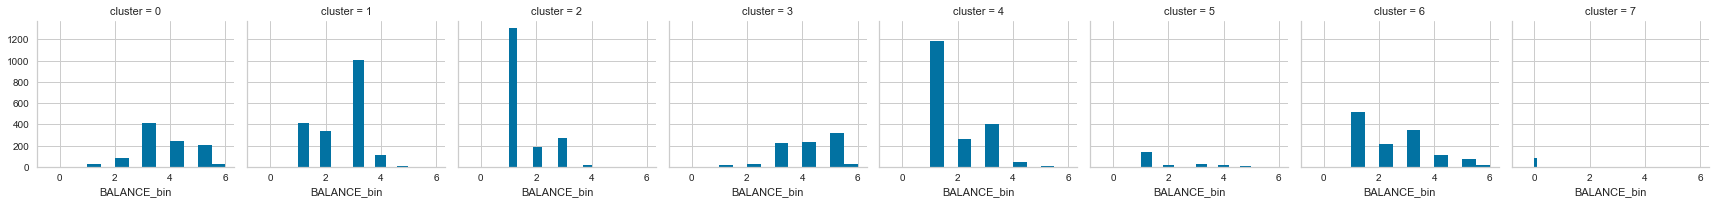

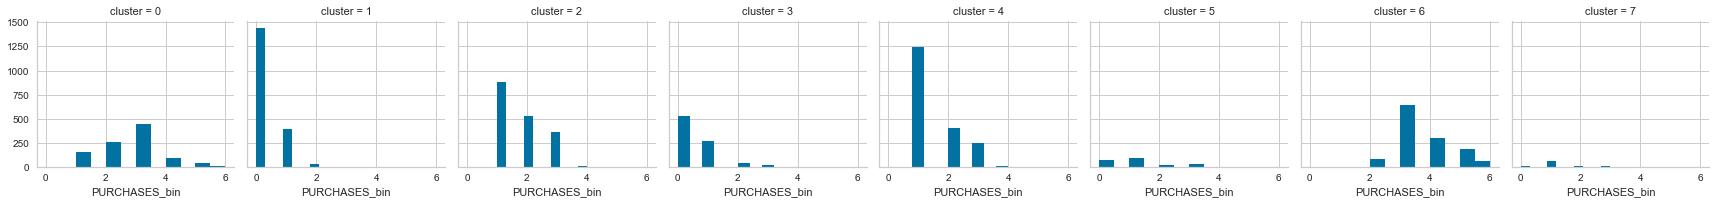

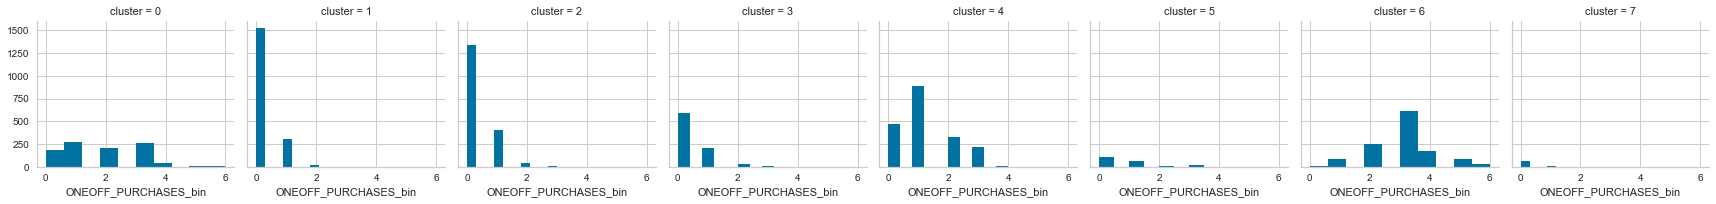

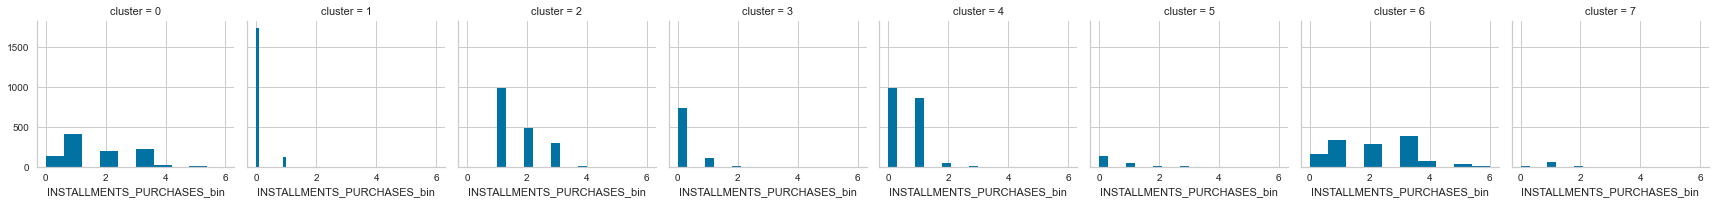

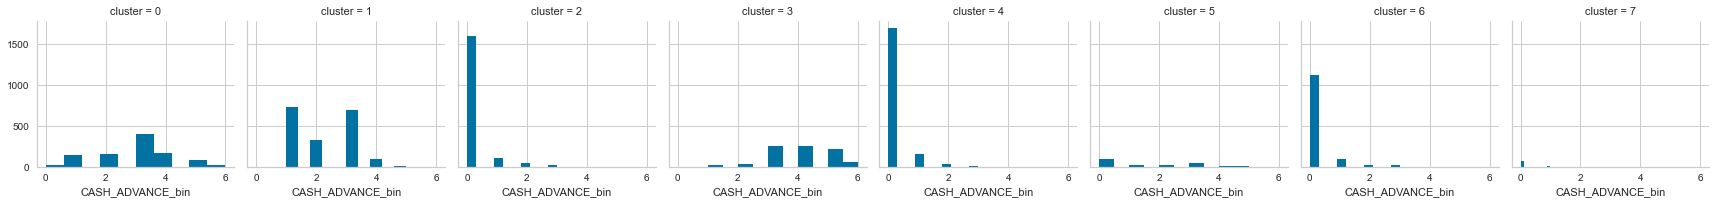

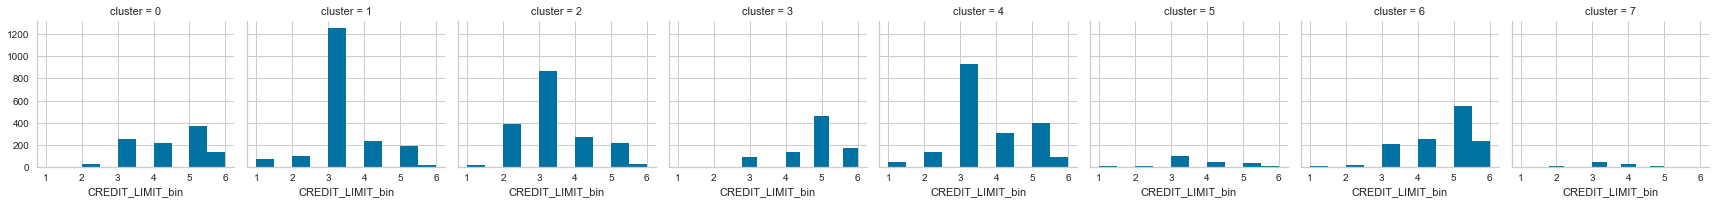

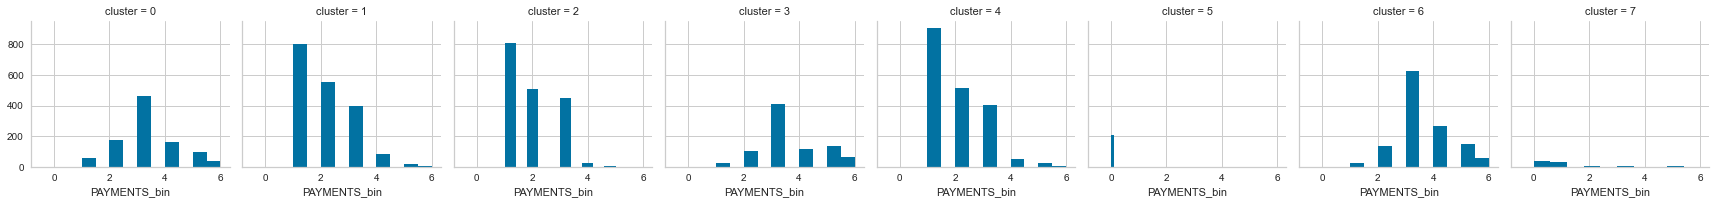

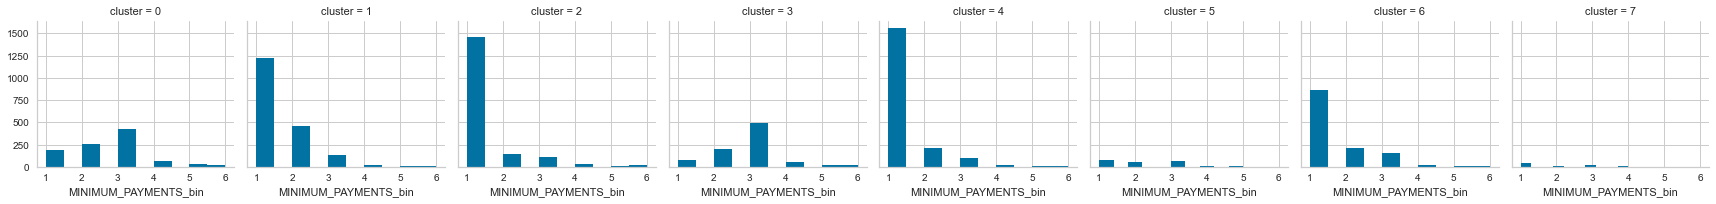

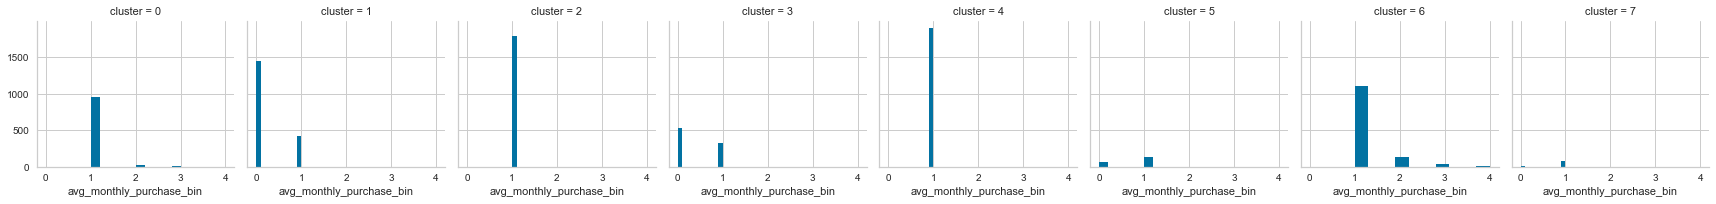

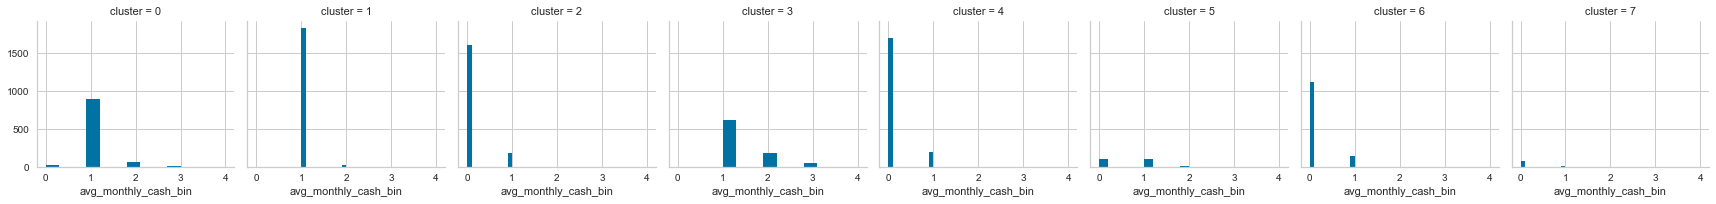

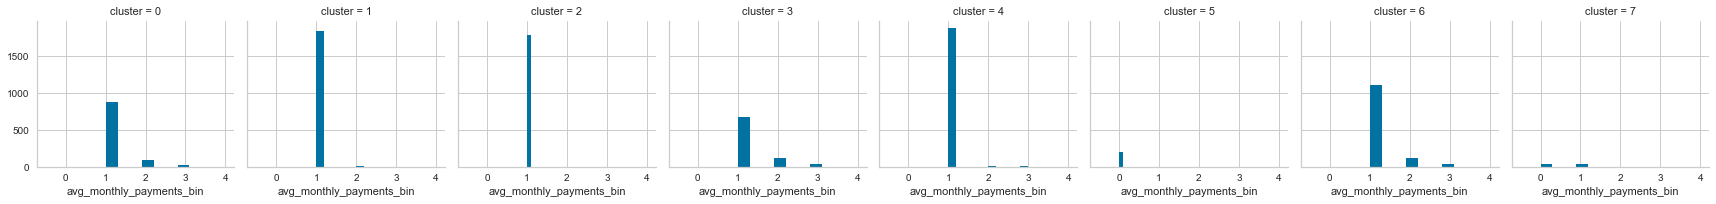

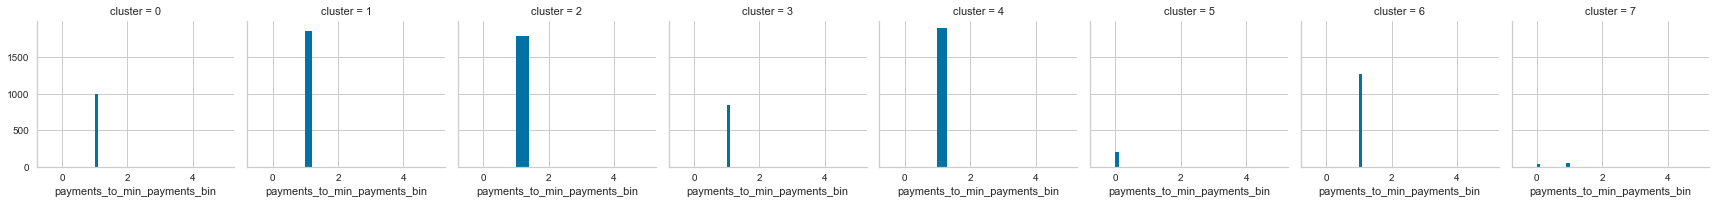

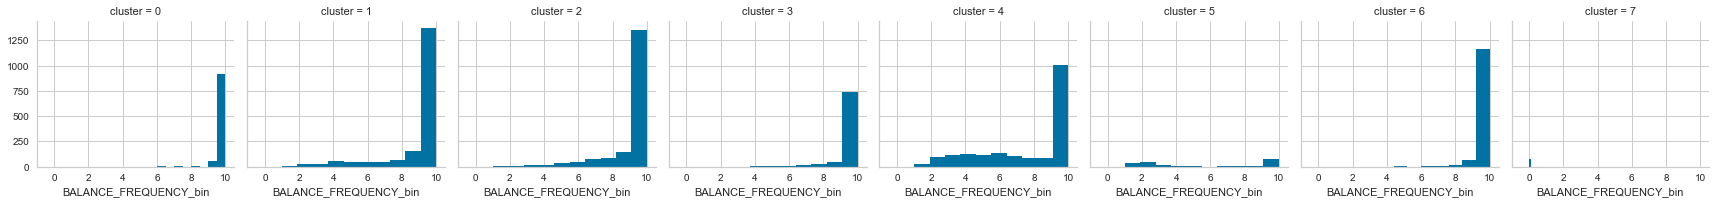

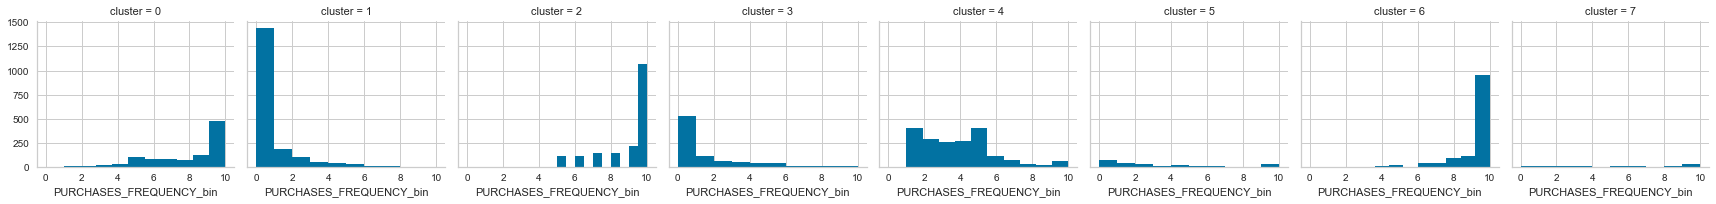

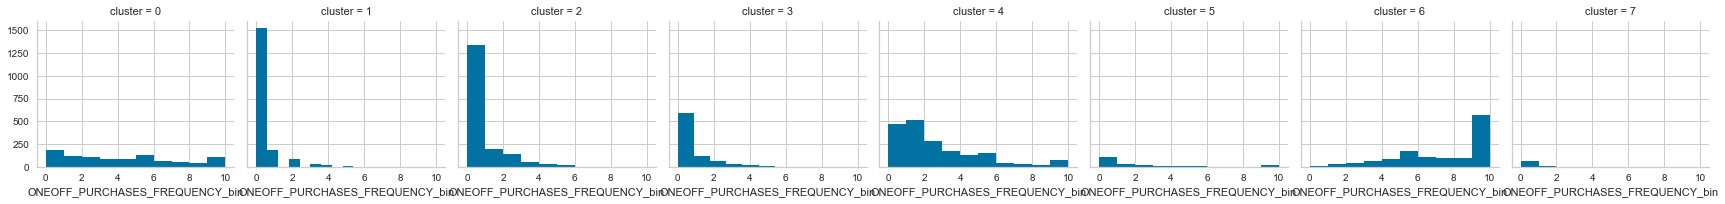

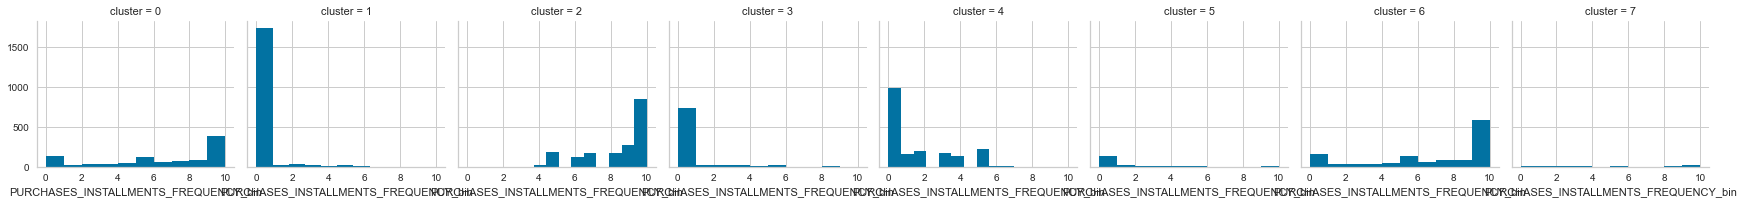

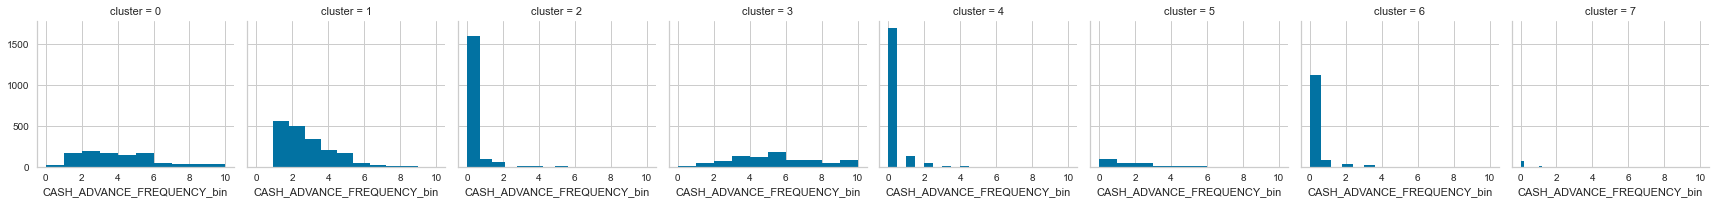

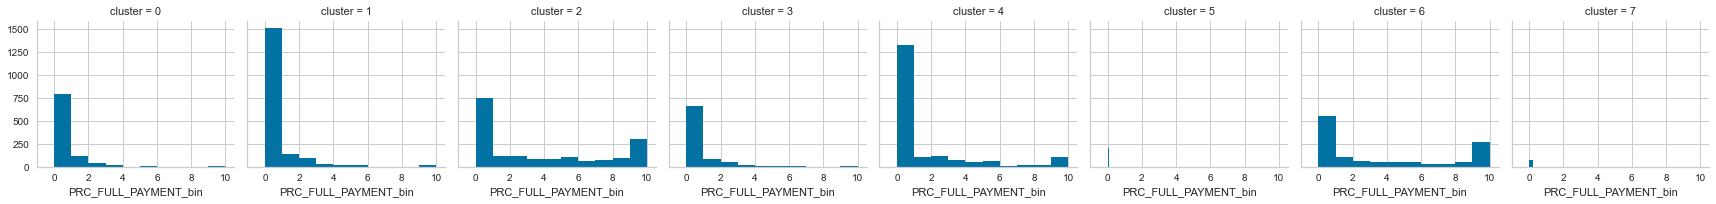

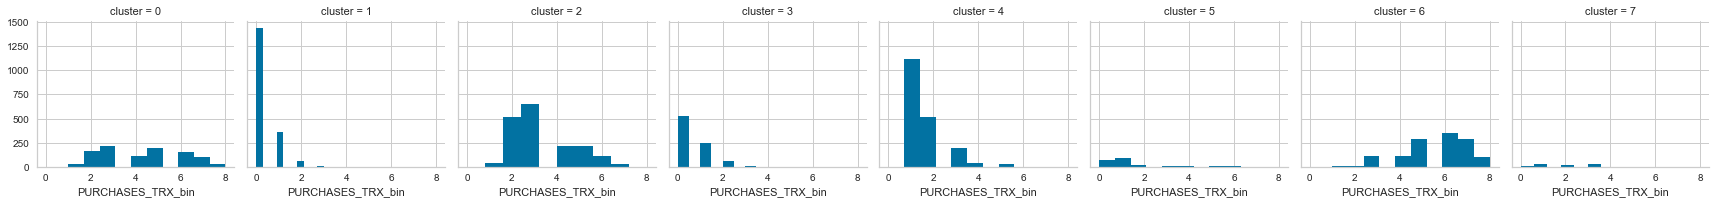

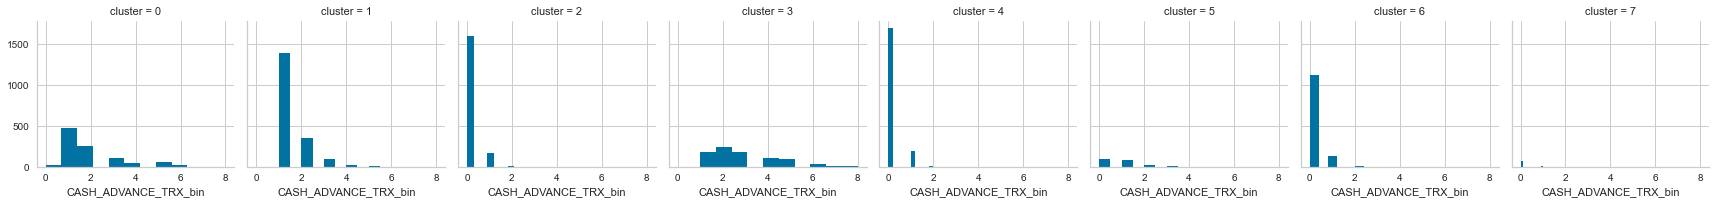

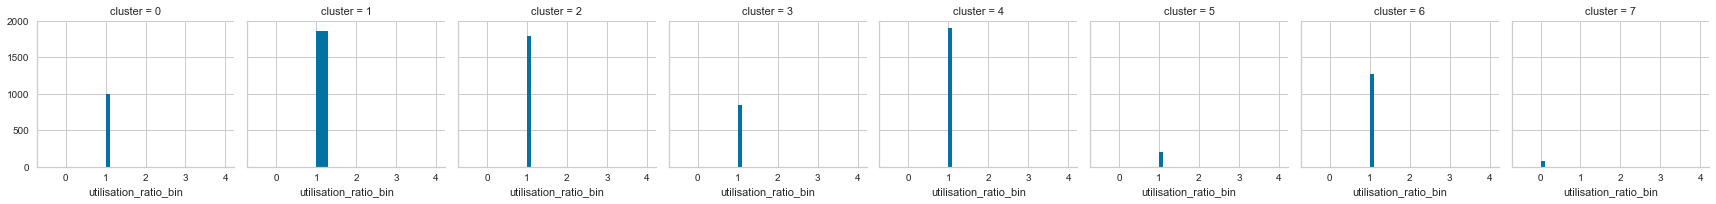

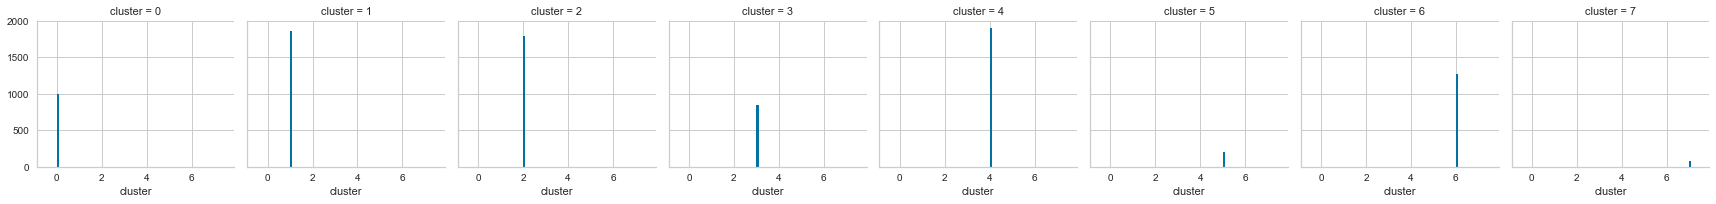

In [96]:
for c in cluster_df:
    grid= sns.FacetGrid(cluster_df, col='cluster')
    grid.map(plt.hist, c)

In [122]:
#Clusters distribution/mean values for features
analysis_df = df.copy()
analysis_df['cluster'] = labels
analysis_df.groupby('cluster').mean().T

cluster,0,1,2,3,4,5,6,7
BALANCE,3482.227439,1336.899187,419.935686,4604.323830,651.117207,846.375038,1558.267236,0.000000
BALANCE_FREQUENCY,0.981081,0.895280,0.910941,0.957686,0.746362,0.546338,0.973608,0.000000
PURCHASES,1719.862241,44.726362,692.690890,130.829823,496.142530,445.453854,3767.682437,267.256750
ONEOFF_PURCHASES,961.384583,35.752762,65.012787,102.296490,401.836667,326.388341,2553.702776,70.872125
INSTALLMENTS_PURCHASES,758.499990,8.984347,628.460621,28.653086,94.591627,119.065512,1214.452847,196.384625
CASH_ADVANCE,2406.780603,1100.696515,50.493954,4588.241771,44.035452,839.987803,58.590863,21.566645
PURCHASES_FREQUENCY,0.793982,0.043359,0.868614,0.095938,0.329026,0.243368,0.918824,0.531450
ONEOFF_PURCHASES_FREQUENCY,0.350177,0.026374,0.045524,0.053490,0.199864,0.146909,0.689897,0.025963
PURCHASES_INSTALLMENTS_FREQUENCY,0.604746,0.015373,0.820277,0.040063,0.130210,0.123749,0.644863,0.505373
CASH_ADVANCE_FREQUENCY,0.313666,0.224770,0.014969,0.456777,0.013096,0.097128,0.014897,0.010561


In [104]:
# #To better visualise the clusters in 2D, the PCA components will be set to 2
distance = 1 - cosine_similarity(df_scaled)

pca = PCA(n_components = 2)
pca.fit(distance)
x_pca = pca.transform(distance)

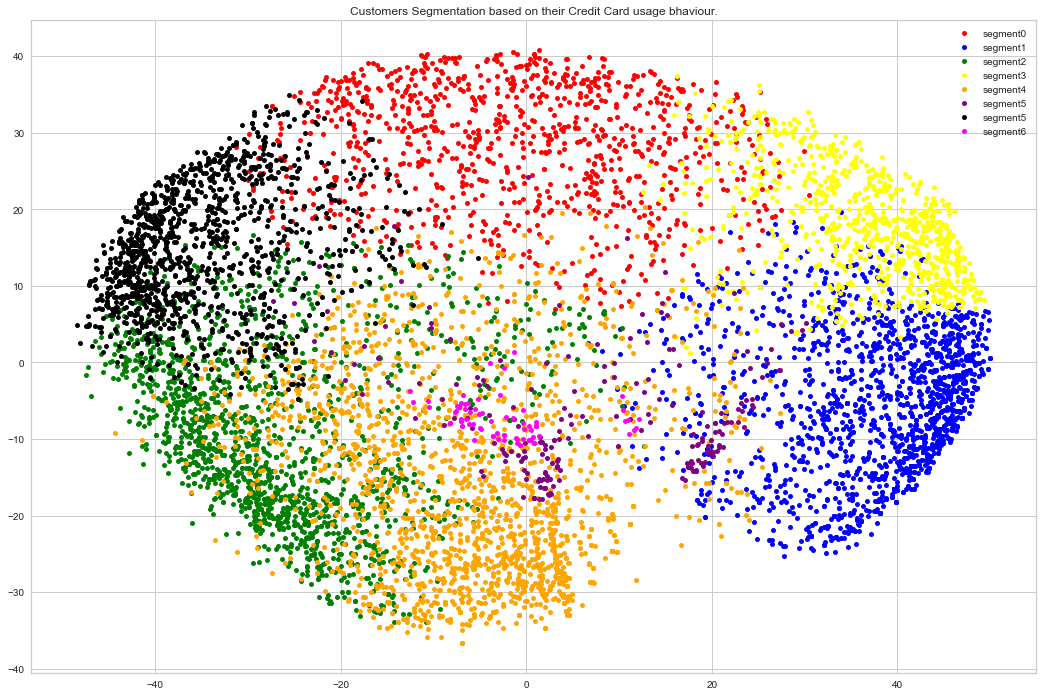

In [105]:
x, y = x_pca[:, 0], x_pca[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5: 'purple',
          6: 'black',
          7: 'magenta'
         
         }

names = {0: 'segment0', 
         1: 'segment1', 
         2: 'segment2', 
         3: 'segment3', 
         4: 'segment4',
         5: 'segment5',
         6: 'segment5',
         7: 'segment6'
        }
  
df_plot = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df_plot.groupby('label')

fig, ax = plt.subplots(figsize=(18, 12)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

In [ ]:
# Both = 0.0 , Cash = 1.0, Installment = 2.0, One_off = 3.0